In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
start = '2000-01-01'
end = '2022-12-31'

df = pd.read_csv('apple stocks.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.849468,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.777850,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.789232,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.720933,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.755083,460734400


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5782,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900
5783,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800
5784,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400
5785,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.233658,75703700
5786,2022-12-30,128.410004,129.949997,127.430000,129.929993,129.552719,77034200


In [6]:
df=df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.849468,535796800
1,1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.777850,512377600
2,2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.789232,778321600
3,3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.720933,767972800
4,4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.755083,460734400


In [7]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,0.936384,1.004464,0.907924,0.999442,535796800
1,1,0.966518,0.987723,0.903460,0.915179,512377600
2,2,0.926339,0.987165,0.919643,0.928571,778321600
3,3,0.947545,0.955357,0.848214,0.848214,767972800
4,4,0.861607,0.901786,0.852679,0.888393,460734400


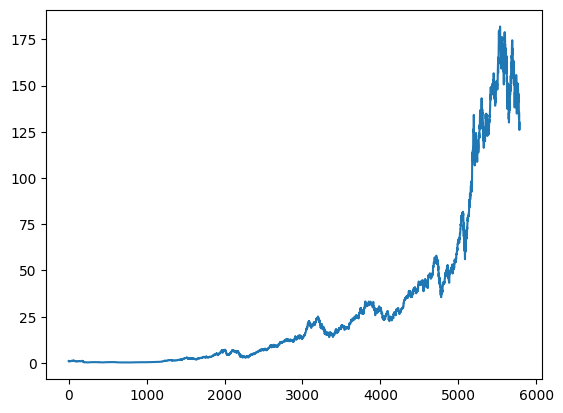

In [8]:
plt.plot (df.Close)

In [9]:
df

,index,Open,High,Low,Close,Volume
0,0,0.936384,1.004464,0.907924,0.999442,535796800
1,1,0.966518,0.987723,0.903460,0.915179,512377600
2,2,0.926339,0.987165,0.919643,0.928571,778321600
3,3,0.947545,0.955357,0.848214,0.848214,767972800
4,4,0.861607,0.901786,0.852679,0.888393,460734400
...,...,...,...,...,...,...
5782,5782,130.919998,132.419998,129.639999,131.860001,63814900
5783,5783,131.380005,131.410004,128.720001,130.029999,69007800
5784,5784,129.669998,131.029999,125.870003,126.040001,85438400
5785,5785,127.989998,130.479996,127.730003,129.610001,75703700


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5782    150.515600
5783    150.157800
5784    149.764699
5785    149.412100
5786    149.062200
Name: Close, Length: 5787, dtype: float64

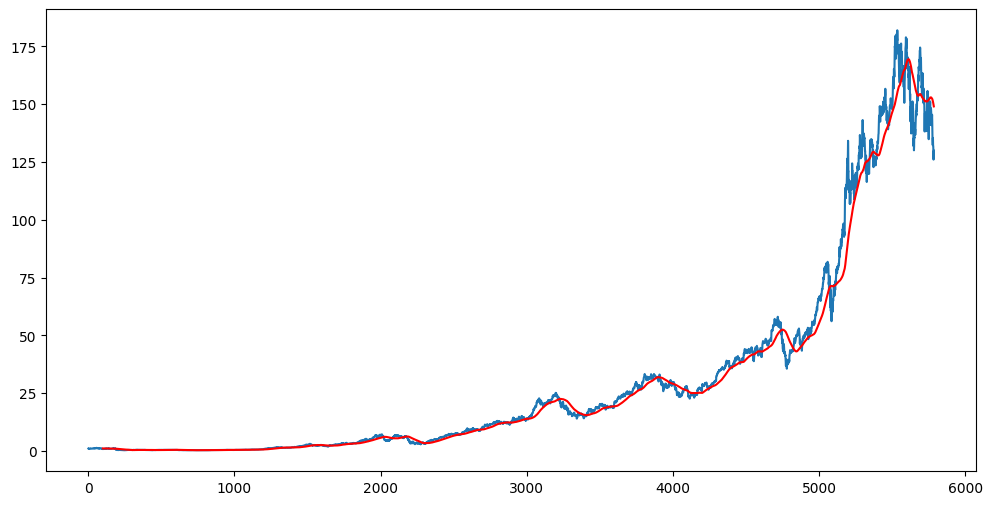

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5782    152.1331
5783    152.0096
5784    151.8867
5785    151.7593
5786    151.6110
Name: Close, Length: 5787, dtype: float64

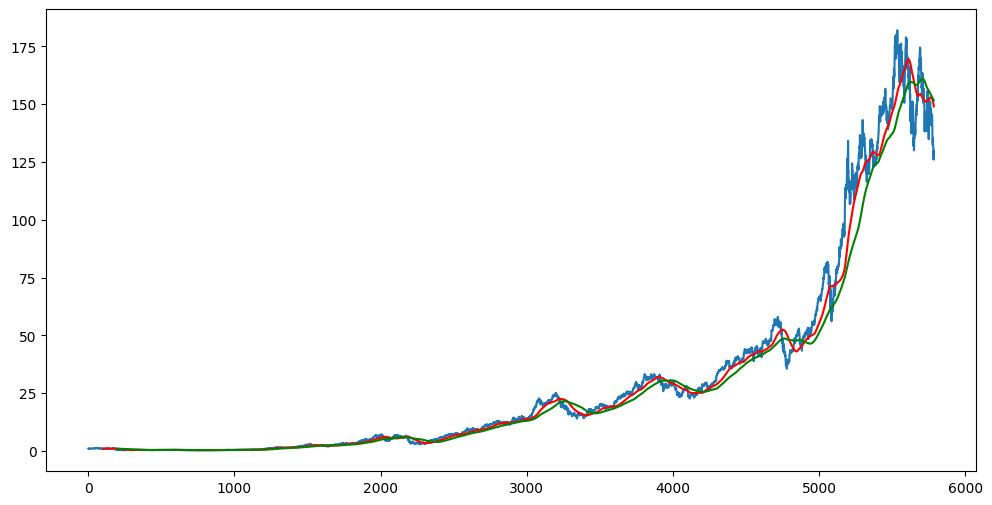

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(5787, 6)

In [15]:
# Spliting data into training and testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(4050, 1)
(1737, 1)


In [16]:
data_training.head()

,Close
0,0.999442
1,0.915179
2,0.928571
3,0.848214
4,0.888393


In [17]:
data_testing.head()

,Close
4050,23.747499
4051,23.567499
4052,23.424999
4053,23.497499
4054,24.160000


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02317551],
       [0.0206233 ],
       [0.02102893],
       ...,
       [0.72437367],
       [0.70483749],
       [0.71233398]])

In [20]:
data_training_array.shape

(4050, 1)

In [21]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0] ):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(3950, 100, 1)

In [23]:
# ML Model

In [24]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
124/124 [==============================] - 31s 212ms/step - loss: 0.0189
Epoch 2/50
124/124 [==============================] - 27s 220ms/step - loss: 0.0050
Epoch 3/50
124/124 [==============================] - 27s 218ms/step - loss: 0.0042
Epoch 4/50
124/124 [==============================] - 26s 208ms/step - loss: 0.0037
Epoch 5/50
124/124 [==============================] - 27s 222ms/step - loss: 0.0038
Epoch 6/50
124/124 [==============================] - 30s 239ms/step - loss: 0.0032
Epoch 7/50
124/124 [==============================] - 30s 241ms/step - loss: 0.0034
Epoch 8/50
124/124 [==============================] - 31s 247ms/step - loss: 0.0032
Epoch 9/50
124/124 [==============================] - 29s 238ms/step - loss: 0.0030
Epoch 10/50
124/124 [==============================] - 37s 300ms/step - loss: 0.0030
Epoch 11/50
124/124 [==============================] - 38s 303ms/step - loss: 0.0030
Epoch 12/50
124/124 [==============================] - 36s 290ms/step - lo

In [28]:
model.save('keras_model.h5')

In [29]:
data_testing.head()

,Close
4050,23.747499
4051,23.567499
4052,23.424999
4053,23.497499
4054,24.160000


In [30]:
data_training.tail(100)

,Close
3950,29.102501
3951,28.480000
3952,28.362499
3953,28.802500
3954,28.350000
...,...
4045,23.620001
4046,24.087500
4047,24.150000
4048,23.504999


In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing, ignore_index= True )

C:\Users\dell\AppData\Local\Temp\ipykernel_24004\3403787647.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index= True )


In [33]:
final_df.head()

,Close
0,29.102501
1,28.480000
2,28.362499
3,28.802500
4,28.350000


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04088131],
       [0.03697664],
       [0.03623961],
       ...,
       [0.64892586],
       [0.67131883],
       [0.67332599]])

In [35]:
input_data.shape

(1837, 1)

In [36]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1737, 100, 1)
(1737,)


In [38]:
# Making Predictions

y_predicted = model.predict(x_test)

55/55 [==============================] - 9s 129ms/step


In [39]:
y_predicted.shape

(1737, 1)

In [40]:
y_test

array([0.00729183, 0.00616277, 0.00526894, ..., 0.64892586, 0.67131883,
       0.67332599])

In [41]:
y_predicted

array([[0.03531432],
       [0.03486127],
       [0.03442645],
       ...,
       [0.71935993],
       [0.7101264 ],
       [0.70113444]], dtype=float32)

In [42]:
scaler.scale_

array([0.00627254])

In [43]:
scale_factor = 1/0.00627254
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

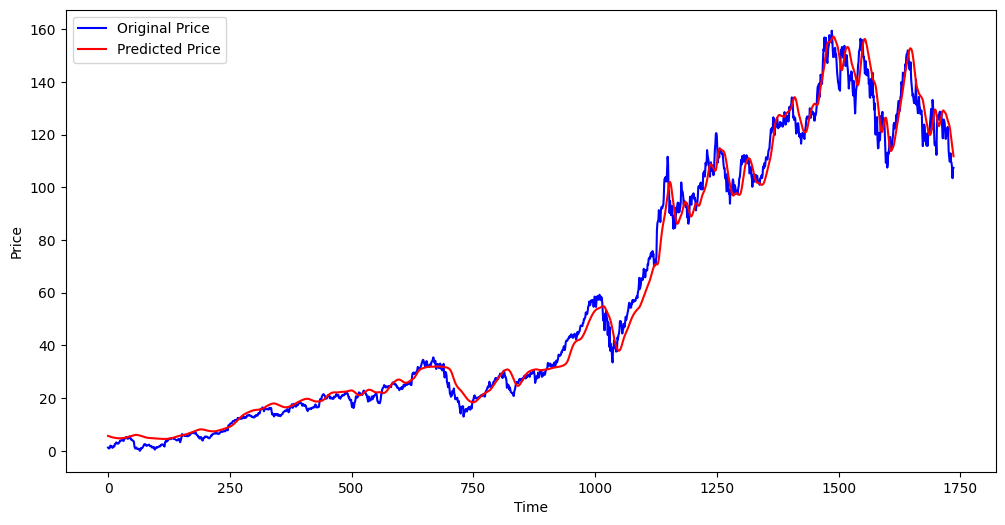

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()